---
# Filtros de señales

---
## Pasa baja 
Este tipo de filtro permite que pasen las frecuencias por debajo de un cierto umbral y atenúa las frecuencias por encima de ese umbral. Esto puede ser útil si tu señal tiene un ruido de alta frecuencia que deseas eliminar

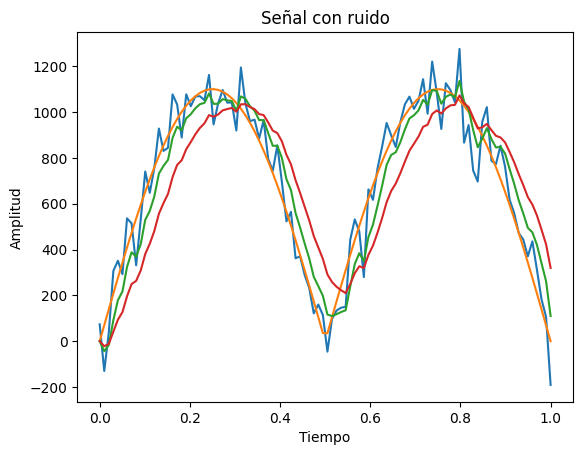

In [4]:
import numpy as np 
import matplotlib.pyplot as plt


# Parámetros de la señal
frec = 1
muestras = 100
amplitud = 1100

# Senal sin ruido 
t = np.linspace(0, 1, muestras)
signal = abs(amplitud * np.sin(2 * np.pi * frec * t))

# Senal con ruido
ruido = np.random.normal(0, 100, signal.shape)
signal_noise = signal + ruido

# Filtrado primero
RC = 0.02
dt = t[2] - t[1]
alpha = RC / (RC + dt)
filtered = np.zeros_like(signal_noise)
for i in range(1, len(signal_noise)):
    filtered[i] = alpha * filtered[i - 1] + (1 - alpha) * signal_noise[i]

# Filtrado primero
RC2 = 0.05
alpha2 = RC2 / (RC2 + dt)
filtered2 = np.zeros_like(signal_noise)
for i in range(1, len(signal_noise)):
    filtered2[i] = alpha2 * filtered2[i - 1] + (1 - alpha2) * signal_noise[i]



# Graficar señal con ruido
plt.plot(t, signal_noise, label='Ruido')
plt.plot(t, signal, label='senal')
plt.plot(t, filtered, label='Filtrado')
plt.plot(t, filtered2, label='Filtrado2')
plt.title('Señal con ruido')
plt.xlabel('Tiempo')
plt.ylabel('Amplitud')
plt.show()

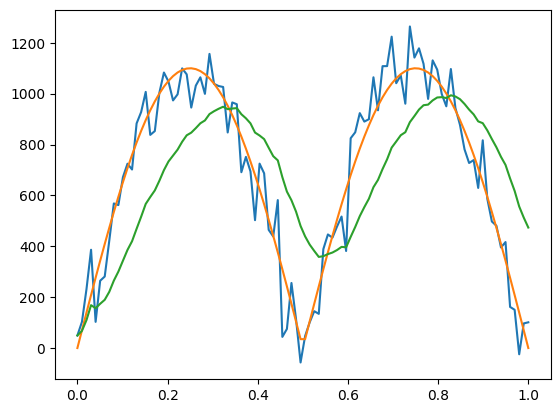

In [44]:
class KalmanFilter:
    def __init__(self, initial_estimate, initial_error_estimate, measurement_error, process_noise):
        self.estimate = initial_estimate
        self.error_estimate = initial_error_estimate
        self.measurement_error = measurement_error
        self.process_noise = process_noise

    def update(self, measurement):
        # Predicción
        self.estimate = self.estimate
        self.error_estimate = self.error_estimate + self.process_noise

        # Actualización
        kalman_gain = self.error_estimate / (self.error_estimate + self.measurement_error)
        self.estimate = self.estimate + kalman_gain * (measurement - self.estimate)
        self.error_estimate = (1 - kalman_gain) * self.error_estimate

        return self.estimate


# Aplicar el filtro de Kalman
kf = KalmanFilter(initial_estimate=signal_noise[0], initial_error_estimate=1, measurement_error=1, process_noise=0.01)
signal_filtered = np.zeros_like(signal_noise)
for i in range(len(signal_noise)):
    signal_filtered[i] = kf.update(signal_noise[i])


plt.plot(t, signal_noise, label='Ruido')
plt.plot(t, signal, label='senal')
plt.plot(t, signal_filtered, label='Filtrado')

---
## Exploracion de datos 

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
from scipy.signal import butter, lfilter

def plot(x, y, labx='x', laby='y', type='line', label='Linea'):
    if type == 'line':
        plt.plot(x, y, label=label)
    elif type == 'point':
        plt.scatter(x, y, label=label)
    plt.xlabel(labx)  # Etiqueta del eje x
    plt.ylabel(laby)  # Etiqueta del eje y
    plt.title('Gráfico')  # Título del gráfico
    plt.legend()  # Muestra la leyenda

def lowPass(signal, rc, time):
    RC = rc
    filtered = np.zeros_like(signal)
    filtered[0] = signal[0]
    for i in range(1, len(signal)):
        dt = time[i] - time[i-1]
        alpha = RC / (RC + dt)
        filtered[i] = alpha * filtered[i - 1] + (1 - alpha) * signal[i]

    return filtered

def lowPassButter(df, columns, cutoff, fs, order):
    df_filtered = df.copy()
    # Crear un filtro de paso bajo Butterworth
    b, a = butter(order, cutoff / (0.5 * fs), btype='low')
    
    # Aplicar el filtro a las columnas especificadas
    for col in columns:
        df_filtered[col] = lfilter(b, a, df_filtered[col])
    
    return df_filtered

df = pd.read_csv("data.csv", header=0)

In [2]:
df.head()
#df.describe()

,x,y,time,x_f,y_f
0,794,354,1.688495e+09,1.162318,0.518212
1,788,345,1.688495e+09,5.673664,2.520309
2,782,337,1.688495e+09,14.291107,6.318541
3,804,318,1.688495e+09,26.537874,11.637212
4,823,310,1.688495e+09,42.043709,18.206104


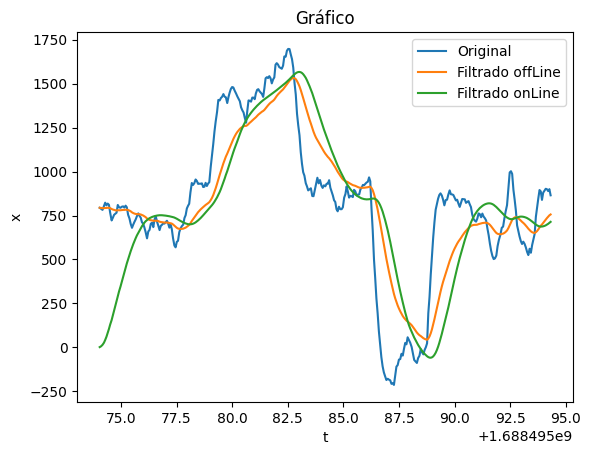

In [9]:
# Filtrado primero
x_f = lowPass(df['x'], 1, df['time'])

plot(df['time'], df['x'], 't', 'x', type='line', label='Original')
plot(df['time'], x_f, 't', 'x', type='line', label='Filtrado offLine')
plot(df['time'], df['x_f'], 't', 'x', type='line', label='Filtrado onLine')

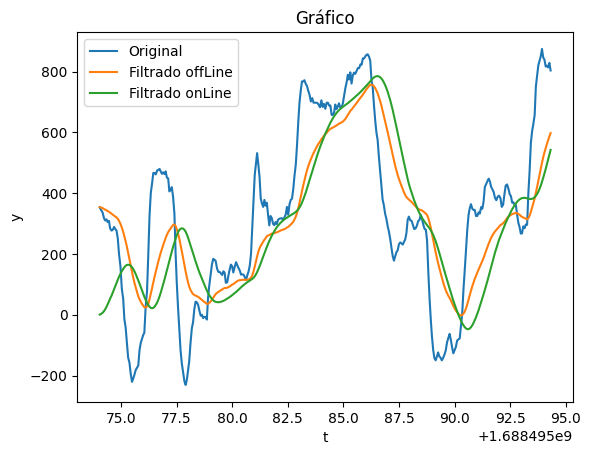

In [10]:
# Filtrado primero
y_f = lowPass(df['y'], 1, df['time'])

plot(df['time'], df['y'], 't', 'y', type='line', label='Original')
plot(df['time'], y_f, 't', 'y', type='line', label='Filtrado offLine')
plot(df['time'], df['y_f'], 't', 'y', type='line', label='Filtrado onLine')

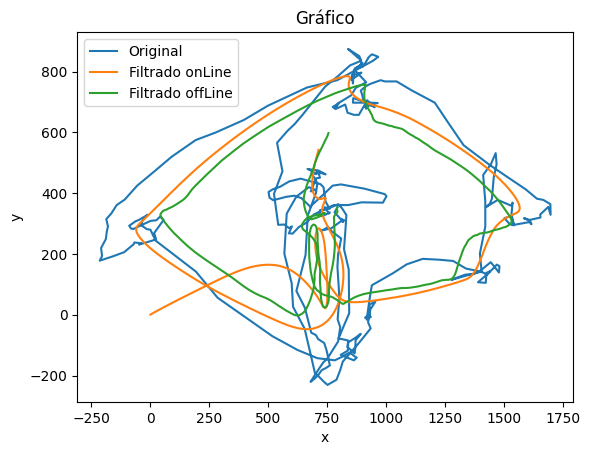

In [11]:
plot(df['x'], df['y'], 'x', 'y', type='line', label='Original')
plot(df['x_f'], df['y_f'], 'x', 'y', type='line', label='Filtrado onLine')
plot(x_f, y_f, 'x', 'y', type='line', label='Filtrado offLine')

15.981024347389633


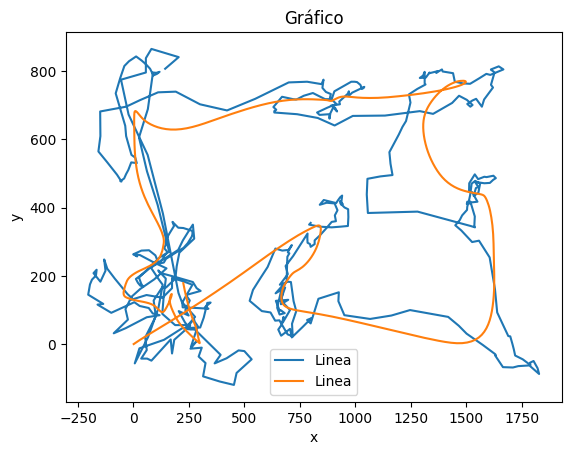

In [97]:
# Supongamos que 'df' es tu DataFrame y 'time' es tu columna de tiempo
time_diff = df['time'].diff()  # Calcula la diferencia entre tiempos consecutivos
sampling_period = time_diff.mean()  # Calcula el período de muestreo promedio
sampling_frequency = 1 / sampling_period  # Calcula la frecuencia de muestreo
print(sampling_frequency)
# --------------------------- Valores del filtro Butter low -------------------------------
filtered_df = lowPassButter(df, ['x', 'y'], cutoff=0.2, fs=16, order=2)
plot(df['x'], df['y'], 'x', 'y', type='line')
plot(filtered_df['x'], filtered_df['y'], 'x', 'y', type='line')

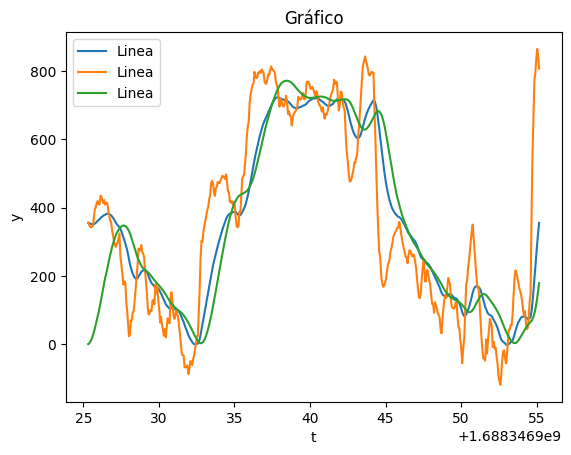

In [98]:
plot(df['time'], y_f, 't', 'y_f', type='line')
plot(df['time'], df['y'], 't', 'y', type='line')
plot(df['time'], filtered_df['y'], 't', 'y', type='line')

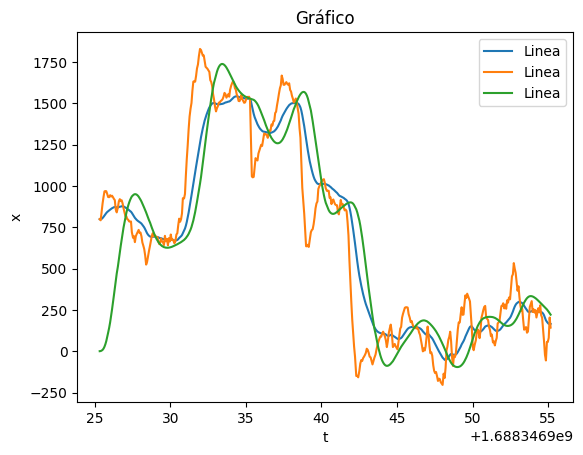

In [79]:
plot(df['time'], x_f, 't', 'x', type='line')
plot(df['time'], df['x'], 't', 'x', type='line')
plot(df['time'], filtered_df['x'], 't', 'x', type='line')